# Theory & Maths behind Regression

Linear / Multi-Linear Regression is more about estimation of continous random variable.

It takes target as well as features as a continous random variable 
<span class="mark">--Mandatory Assumptions--</span> 

1. Linearity : The x and y should have linear relationship 
2. Independence - X1 and X2 should be independent to each other and they should be dependent to TArget 
3. Normality - X and Y should be normally distributed 
--optional---
4. Homoscedasticity - the variance in residual is same as any values of x 

You want to predict the price of house, so price become target and rest all others are your features 

here we define everything as a features: f(area of the house, pollution in air, crime rate at specific location , distance from work location, distance from hospital or healthcare instituition

and Target is "Price of house"


f(area of the house, pollution in air, crime rate at specific location , distance from work location, distance from hospital or healthcare instituition)  ===> Price of house 



<span class="mark">Equation of regression Line:</span>

   Y = sum(Be0 + Ben*Xn + error) 
   
 <span class="mark">Sum of Square</span> is one of the technique to determine best fit regression line 
 
 There are <span class="mark">three type of sum of squares</span> 
     1. Total Sum of Square (TSS) 
     2. Sum of Suquare Regression ( SSR) 
     3. Sum of Squared Error ( SSE) 
     
     
 <span class="mark">Total Sum of Square Error - (TSS)</span> 
  - SQRT(SUM( y - ym)2)
  
  <span class="mark">SUM of Square Regression (SSR)</span> -- indicating difference of prediction from sample mean
  - SQRT(SUM( ypr - ym)2)
  
  
  <span class="mark">SUM of Square Error (SSE)</span> -- indicating the difference in prediction from actual values 
  - SQRT(SUM(y - ypr)2)

 MSE = SQRT(SUM(y - ypr)2) / n
 
 <span class="mark">R-squared Score</span> -- total varience explained by model / total variance 
 R-Square = 1 - (SSE/TSS)
 Range - 0 to 100% 
 
 Larger the R-Square better is the regression Model 
 
 When your R-square is near to 100% it means that all the variance in features are arround its mean 
 When your R-Square is near to 0% it means that all the variance in features are away from mean 

In [11]:
print(house_price_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import sklearn.datasets
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [7]:
house_price_dataset = sklearn.datasets.load_boston()

In [8]:
house_price_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
house_dataset = pd.DataFrame(house_price_dataset.data, columns  = house_price_dataset.feature_names )

In [10]:
house_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
house_dataset.shape

(506, 13)

In [13]:
house_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
house_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


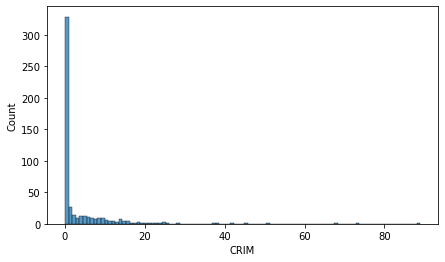

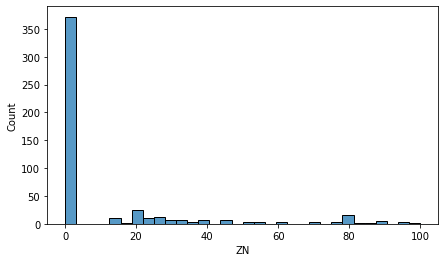

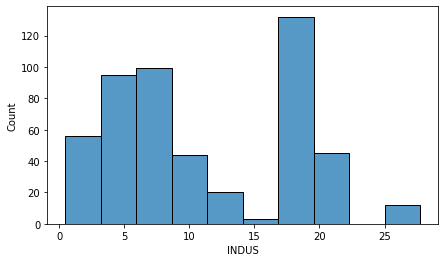

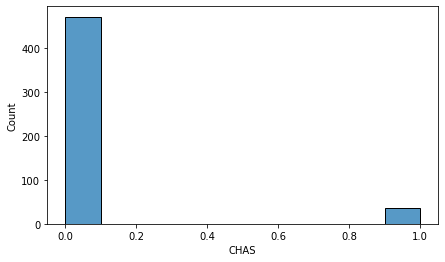

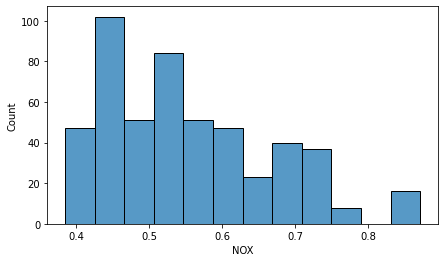

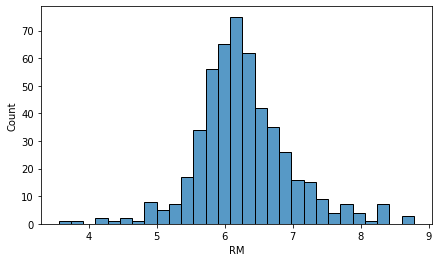

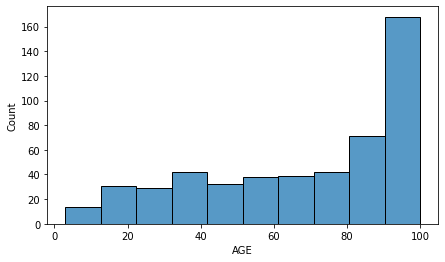

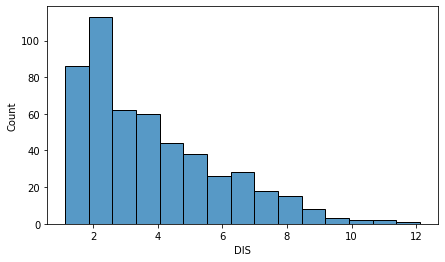

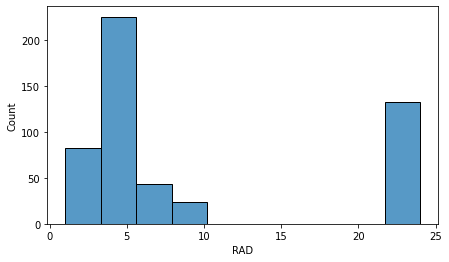

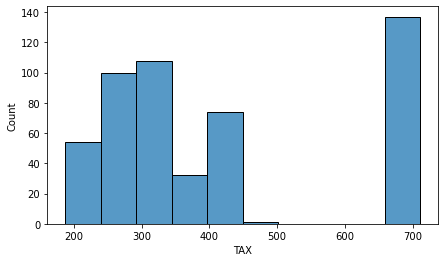

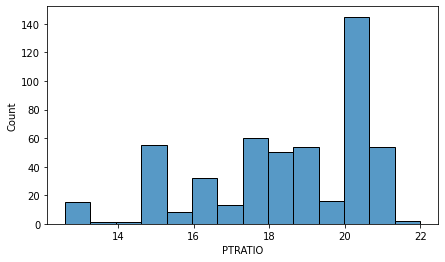

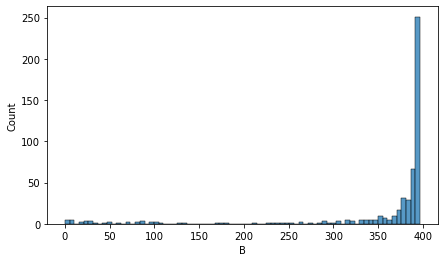

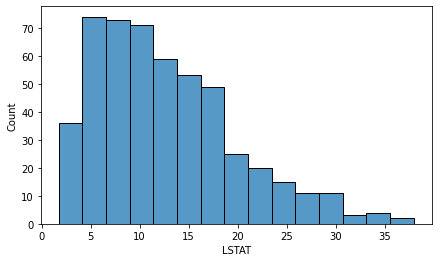

In [16]:
import seaborn as sns 
for i in house_dataset.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(data = house_dataset, x = i)
    plt.show()

In [18]:
house_dataset['Price'] = house_price_dataset.target

In [19]:
house_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


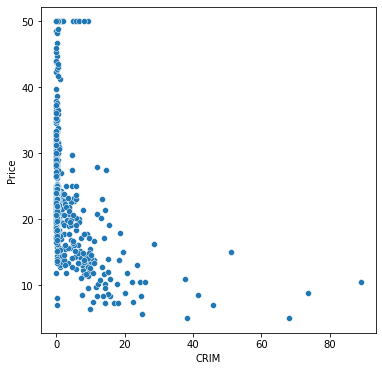

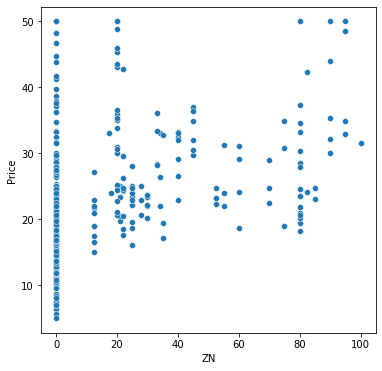

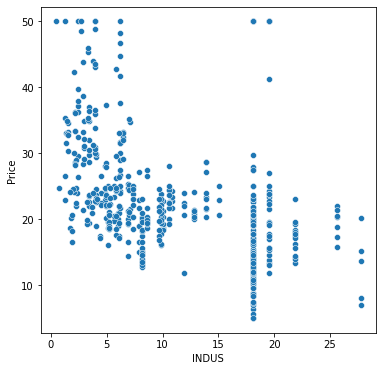

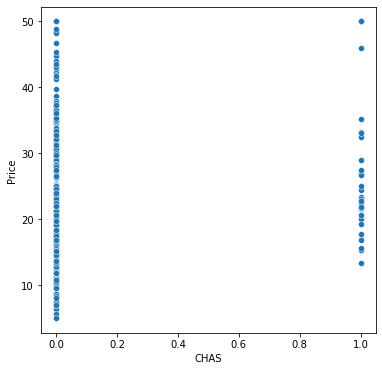

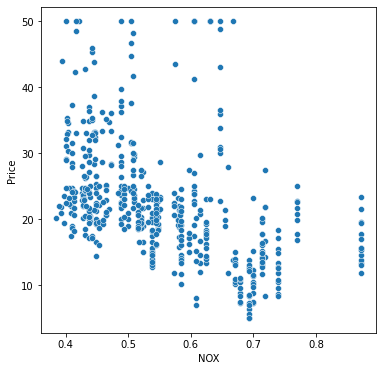

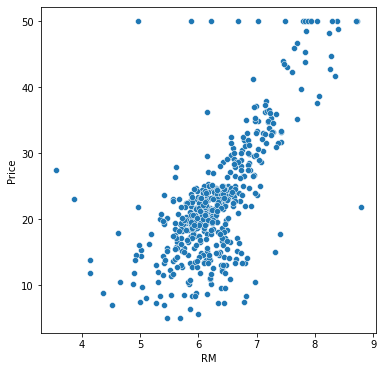

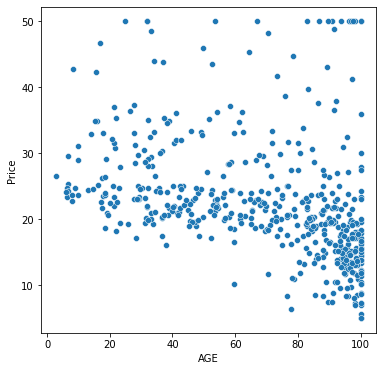

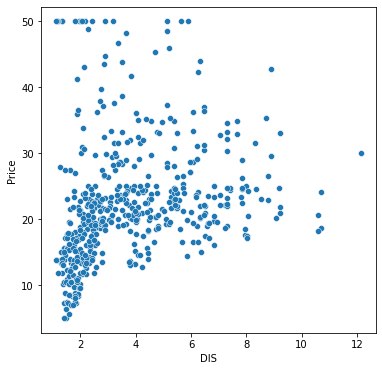

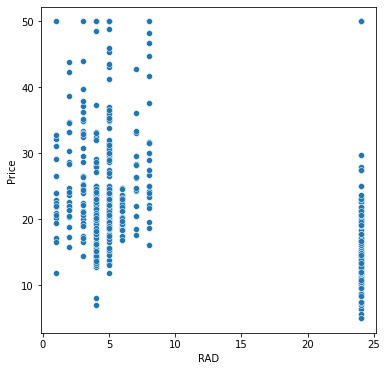

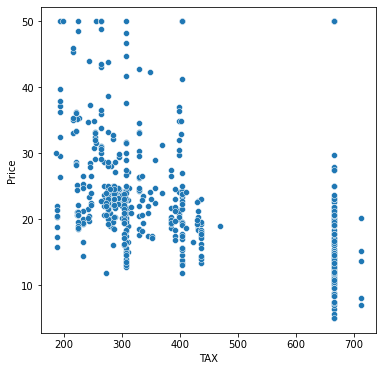

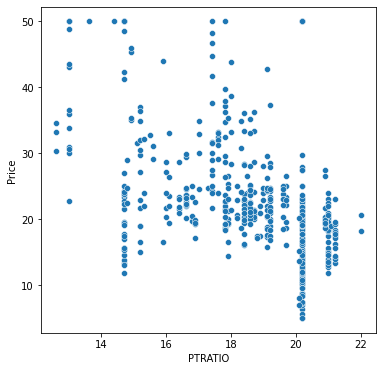

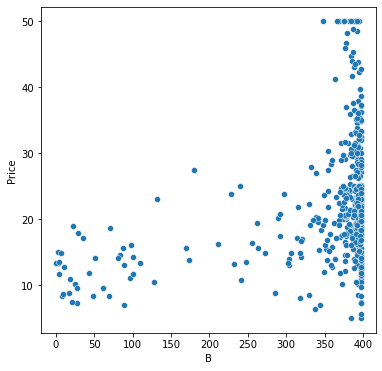

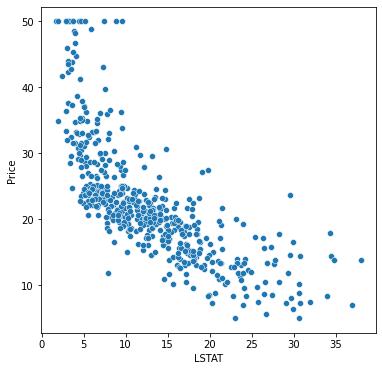

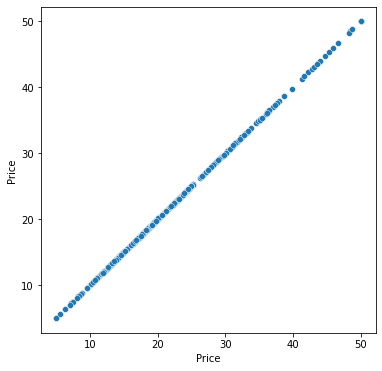

In [20]:
for i in house_dataset.columns:
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=house_dataset, x=i, y = "Price")
    plt.show()

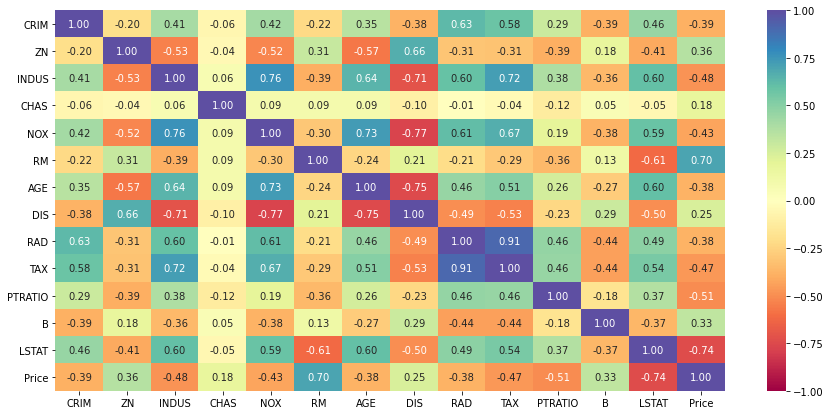

In [23]:
plt.figure(figsize=(15, 7))
sns.heatmap(house_dataset.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [25]:
X = house_dataset.drop('Price', axis=1)
y = house_dataset['Price']

In [66]:
X.shape

(506, 13)

In [67]:
0.3*506

151.79999999999998

In [27]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [29]:
X_train.shape

(354, 13)

In [30]:
X_test.shape

(152, 13)

In [31]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12


In [32]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [55]:
predict_val = regression_model.predict(X_train)

In [56]:
predict_val[0:5]

array([19.49451875, 18.82565898, 19.41807533, 32.03931878, 17.2230352 ])

In [53]:
Y_test[0:5]

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: Price, dtype: float64

In [34]:
print("The R-Squared Score is : ", regression_model.score(X_train, Y_train))

The R-Squared Score is :  0.7103879080674731


In [35]:
def r_squared(model, X, y):
    y_mean = y.mean()
    TSS = ((y - y_mean)**2).sum()
    SSE = ((y - model.predict(X))**2).sum()
    r_square = 1 - SSE/TSS
    return SSE, TSS, r_square

In [37]:
SSE, TSS, r_squared = r_squared(regression_model, X_train, Y_train)
print("SSE", SSE)
print("TSS", TSS)
print("R_SQAURE", r_squared)

SSE 8323.720395061766
TSS 28740.928389830508
R_SQAURE 0.7103879080674731


In [40]:
print("Rsquared for Test Data", regression_model.score(X_test, Y_test))

Rsquared for Test Data 0.7836295385076297


In [41]:
coef_df = pd.DataFrame(np.append(regression_model.coef_,
                                 regression_model.intercept_),
                       index=X_train.columns.tolist() + ["intercept"], columns=["coefficient"])

In [42]:
coef_df

,coefficient
CRIM,-0.098542
ZN,0.060784
INDUS,0.059172
CHAS,2.439560
NOX,-21.469965
RM,2.795814
AGE,0.003575
DIS,-1.516272
RAD,0.307542
TAX,-0.011280


In [44]:
Equation = "Price = " + str(regression_model.intercept_)
print(Equation, end=" ")

for i in range(len(X_train.columns)):
    if i != len(X_train.columns) - 1:
        print(
            "+ (",
            regression_model.coef_[i],
            ")*(",
            X_train.columns[i],
            ")",
            end=" ",
        )
    else:
        print("+ (", regression_model.coef_[i], ")*(", X_train.columns[i], ")")

Price = 46.39649387182382 + ( -0.09854247168320399 )*( CRIM ) + ( 0.06078411384243338 )*( ZN ) + ( 0.05917154006563337 )*( INDUS ) + ( 2.4395598751551 )*( CHAS ) + ( -21.469964963214267 )*( NOX ) + ( 2.795813854535863 )*( RM ) + ( 0.003574597775943597 )*( AGE ) + ( -1.5162721842398463 )*( DIS ) + ( 0.30754174546451446 )*( RAD ) + ( -0.011280016635397147 )*( TAX ) + ( -1.0054664025594202 )*( PTRATIO ) + ( 0.006450184460881083 )*( B ) + ( -0.5688345385334853 )*( LSTAT )


Price = Be0 + Be1*CRIM + Be2*ZN +Be3*INDUS + .....

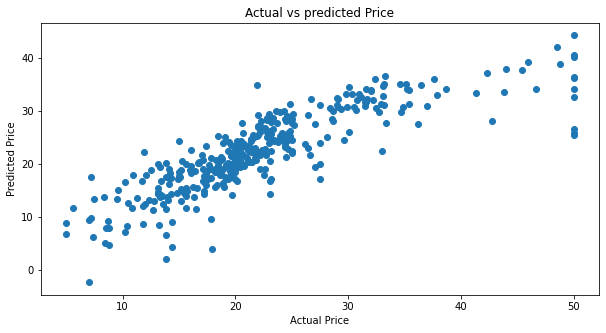

In [58]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_train, predict_val)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted Price")
plt.show()

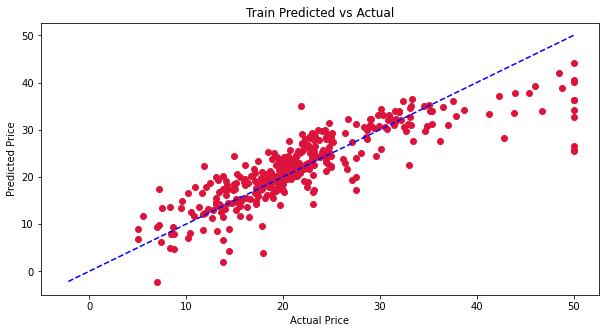

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(Y_train, predict_val, c="crimson")
p1 = max(max(predict_val), max(Y_train))
p2 = min(min(predict_val), min(Y_train))
plt.plot([p1, p2], [p1, p2], 'b--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Train Predicted vs Actual")

plt.show()

In [61]:
predict_test = regression_model.predict(X_test)

In [62]:
predict_test.shape

(152,)

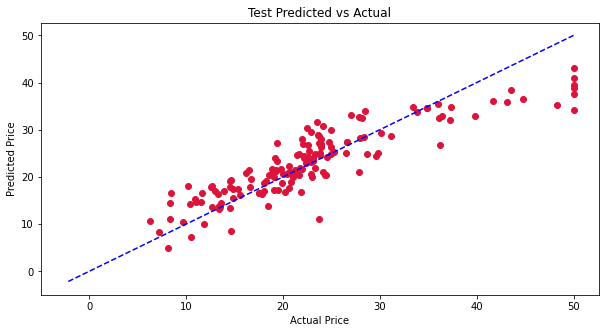

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test, predict_test, c="crimson")
p1 = max(max(predict_val), max(Y_train))
p2 = min(min(predict_val), min(Y_train))
plt.plot([p1, p2], [p1, p2], 'b--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test Predicted vs Actual")

plt.show()